In [54]:
import numpy as np
import matplotlib.pyplot as plt
import calculate_bispectrum as cb 
import os, sys
import h5py
import pandas as pd
# add path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from src.utils import paths

In [55]:
normal_gr = pd.read_pickle("test_bispectra/n_gr.pkl")
normal_newton = pd.read_pickle("test_bispectra/n_newton.pkl")

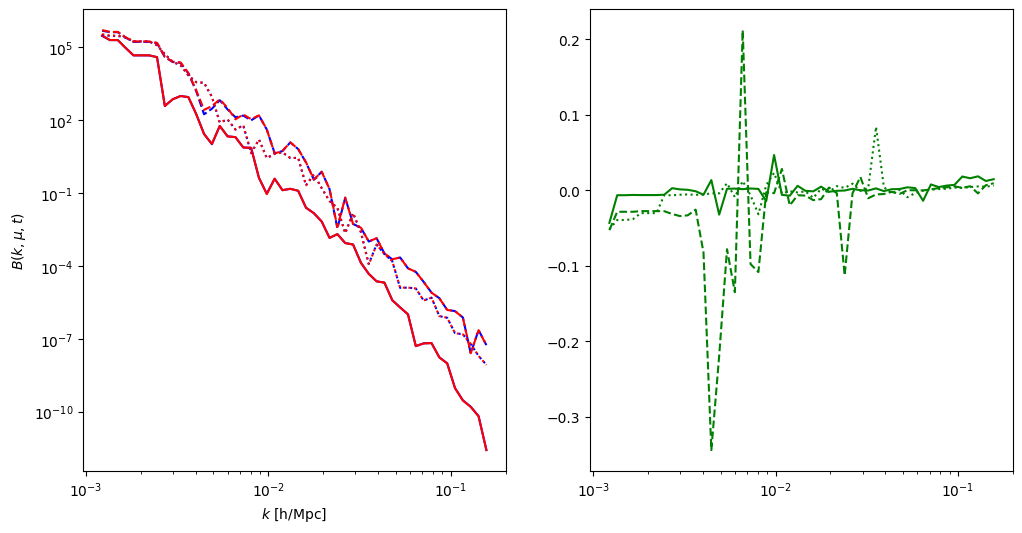

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].loglog(normal_gr["k"], abs(normal_gr["B_equilateral"]), color="blue", label="GR")
ax[0].loglog(normal_newton["k"], abs(normal_newton["B_equilateral"]), color="red", label="Newton")
ax[0].loglog(normal_gr["k"], abs(normal_gr["B_squeezed"]), ls="dashed", color="blue", label="GR")
ax[0].loglog(normal_newton["k"], abs(normal_newton["B_squeezed"]), ls="dashed", color="red", label="Newton")
ax[0].loglog(normal_gr["k"], abs(normal_gr["B_stretched"]), ls="dotted", color="blue", label="GR")
ax[0].loglog(normal_newton["k"], abs(normal_newton["B_stretched"]), ls="dotted", color="red", label="Newton")
ax[0].set_xlabel(r"$k$ [h/Mpc]")
ax[0].set_ylabel(r"$B(k,\mu,t)$")

ax[1].semilogx(normal_gr["k"], (normal_gr["B_equilateral"]-normal_newton["B_equilateral"])/(normal_newton)["B_equilateral"], color="green")
ax[1].semilogx(normal_gr["k"], (normal_gr["B_squeezed"]-normal_newton["B_squeezed"])/(normal_newton)["B_squeezed"], ls="dashed", color="green")
ax[1].semilogx(normal_gr["k"], (normal_gr["B_stretched"]-normal_newton["B_stretched"])/(normal_newton)["B_stretched"], ls="dotted", color="green")
# ax[1].loglog(normal_newton["k"], normal_newton["Pk"], color="red", label="Newton")

In [57]:
normal_gr = pd.read_pickle("test_bispectra/Ae-7_gr.pkl")
normal_newton = pd.read_pickle("test_bispectra/Ae-7_newton.pkl")

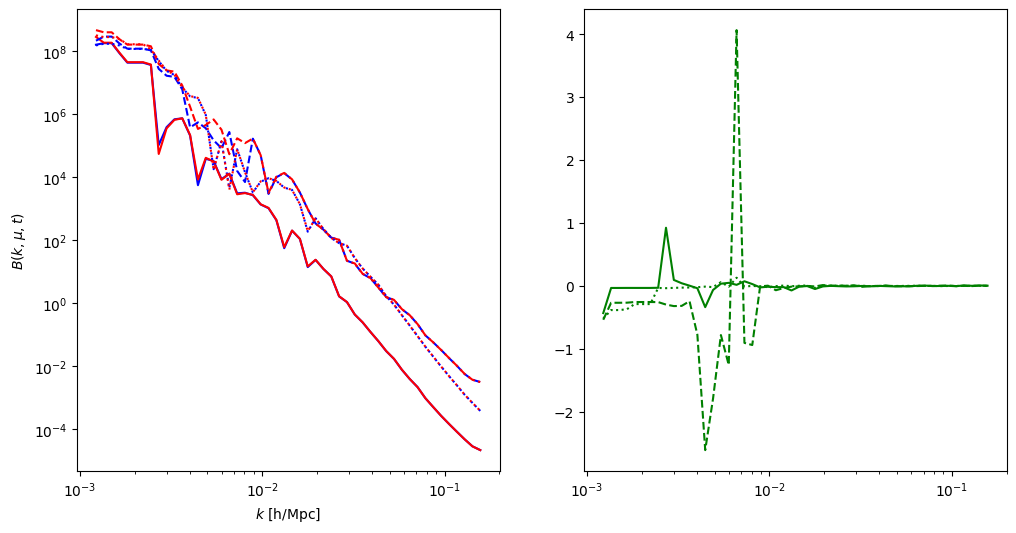

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].loglog(normal_gr["k"], abs(normal_gr["B_equilateral"]), color="blue", label="GR")
ax[0].loglog(normal_newton["k"], abs(normal_newton["B_equilateral"]), color="red", label="Newton")
ax[0].loglog(normal_gr["k"], abs(normal_gr["B_squeezed"]), ls="dashed", color="blue", label="GR")
ax[0].loglog(normal_newton["k"], abs(normal_newton["B_squeezed"]), ls="dashed", color="red", label="Newton")
ax[0].loglog(normal_gr["k"], abs(normal_gr["B_stretched"]), ls="dotted", color="blue", label="GR")
ax[0].loglog(normal_newton["k"], abs(normal_newton["B_stretched"]), ls="dotted", color="red", label="Newton")
ax[0].set_xlabel(r"$k$ [h/Mpc]")
ax[0].set_ylabel(r"$B(k,\mu,t)$")

ax[1].semilogx(normal_gr["k"], (normal_gr["B_equilateral"]-normal_newton["B_equilateral"])/(normal_newton)["B_equilateral"], color="green")
ax[1].semilogx(normal_gr["k"], (normal_gr["B_squeezed"]-normal_newton["B_squeezed"])/(normal_newton)["B_squeezed"], ls="dashed", color="green")
ax[1].semilogx(normal_gr["k"], (normal_gr["B_stretched"]-normal_newton["B_stretched"])/(normal_newton)["B_stretched"], ls="dotted", color="green")

In [59]:
normal_gr = pd.read_pickle("test_bispectra/Ae-6_gr.pkl")
normal_newton = pd.read_pickle("test_bispectra/Ae-6_newton.pkl")

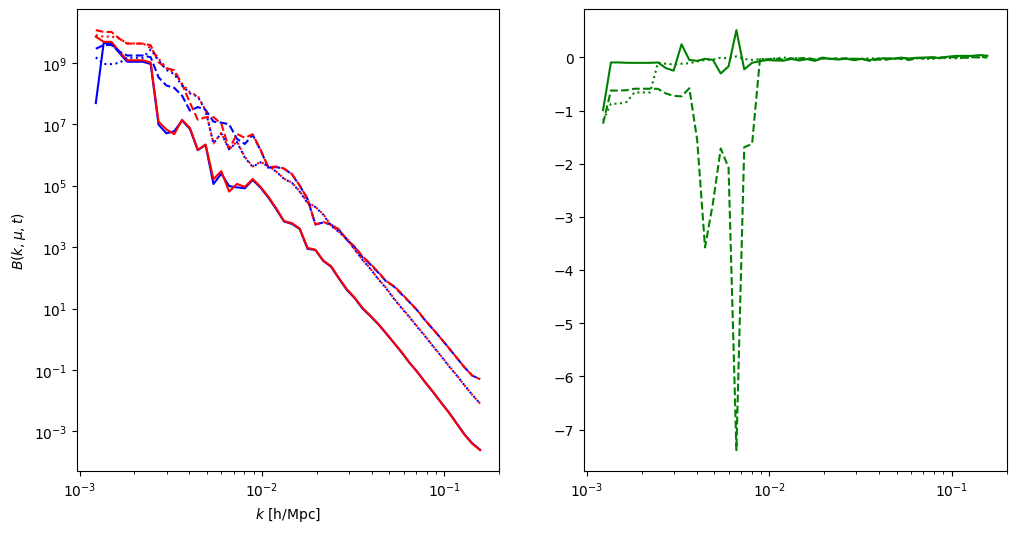

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].loglog(normal_gr["k"], abs(normal_gr["B_equilateral"]), color="blue", label="GR")
ax[0].loglog(normal_newton["k"], abs(normal_newton["B_equilateral"]), color="red", label="Newton")
ax[0].loglog(normal_gr["k"], abs(normal_gr["B_squeezed"]), ls="dashed", color="blue", label="GR")
ax[0].loglog(normal_newton["k"], abs(normal_newton["B_squeezed"]), ls="dashed", color="red", label="Newton")
ax[0].loglog(normal_gr["k"], abs(normal_gr["B_stretched"]), ls="dotted", color="blue", label="GR")
ax[0].loglog(normal_newton["k"], abs(normal_newton["B_stretched"]), ls="dotted", color="red", label="Newton")
ax[0].set_xlabel(r"$k$ [h/Mpc]")
ax[0].set_ylabel(r"$B(k,\mu,t)$")

ax[1].semilogx(normal_gr["k"], (normal_gr["B_equilateral"]-normal_newton["B_equilateral"])/(normal_newton)["B_equilateral"], color="green")
ax[1].semilogx(normal_gr["k"], (normal_gr["B_squeezed"]-normal_newton["B_squeezed"])/(normal_newton)["B_squeezed"], ls="dashed", color="green")
ax[1].semilogx(normal_gr["k"], (normal_gr["B_stretched"]-normal_newton["B_stretched"])/(normal_newton)["B_stretched"], ls="dotted", color="green")